## Why Updator is changing the process time to negative?

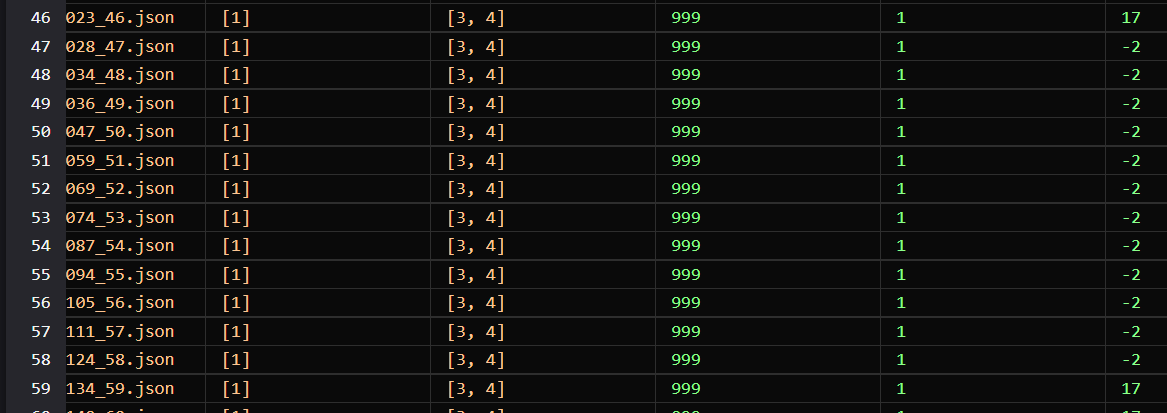

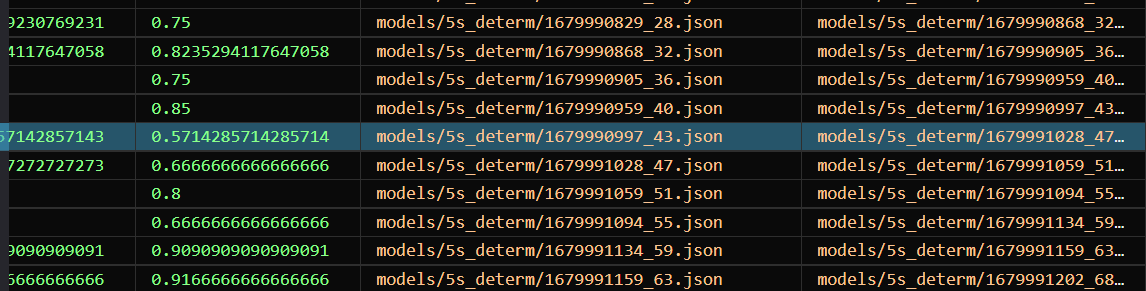

Model 47 was updated with a negative process time. This model is updated in the sync that started with 43 to 47. The timestamp of start and finish is defined in the name of the model. In model 43 the queue 3 is for the first time full. 

In [1]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin as dt
from dtwinpylib.dtwinpy.updator import Updator
from dtwinpylib.dtwinpy.helper import Helper

Model imported...
Validator imported...
Database imported...
Synchronizer imported...
Service_Handler imported...
Broker_Manager imported...
Helper imported...
interfaceAPI imported...
Updator imported...
'dtwinpy' version being used: 0.0.3.9


Create a folder inside of model called 'testing_negPT' and add the initial as the model 43

In [ ]:
mydt = dt(name= 'testing_negPT')
helper = Helper()

digital_model = mydt.generate_digital_model()

#--- Get time now
(tstr, t) = helper.get_time_now()

#--- Define the start and end time updated
start_time_validation = 1679990997 + t
end_time_validation = 1679991028 + t


In [ ]:
#--- Create a updator for input
input_updator = Updator(
    update_type= 'input',
    digital_model= self.digital_model,
    real_database_path= self.real_database_path,
    start_time= start_time,
    end_time= end_time,
    model_last_sync= self.model_last_sync
)

#--- Run the Input Update
input_updator.run()

In [1]:
def generate_qTDS_traces(machines_ids, machine_full_trace):
    """
    Same function used in Validator.
    """
    #--- Extract the unique parts IDs from the real log
    #machines_ids = .get_distinct_values(column= "machine_id", table="real_log")

    #--- Create matrix to store trace of process time for each part
    matrix_ptime_qTDS = {}
    machine_matrix_full_trace = []

    #--- Loop for each part of the simulation
    for machine_id in machines_ids:
        #--- Get the full trace for each machine

        
        
        machine_matrix_full_trace.append(machine_full_trace)

        #--- Initiate as blank values
        started_time = None
        finished_time = None
        processed_time = None
        machine_trace = []

        #--- Flag first start
        flag_first_start_happened = False

        for event in machine_full_trace:
            #--- Extract the Started and Finished time
            if event[1] == 'Started':
                started_time = event[0]
                flag_first_start_happened = True
            elif event[1] == 'Finished':
                finished_time = event[0]
            
            #--- Calculate the process time
            if started_time != None and finished_time != None:
                processed_time = finished_time - started_time

                #--- Add event process time to the machine trace
                machine_trace.append(processed_time)

                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None

            #--- ISSUE #263: In case when the first event is a finished...
            # Previous we were considering that as the process time, because of the worked time
            # but since now in the update we don't consider the worked time, we can't not carry
            # this finish trace for the next event, so reset everything...
            if finished_time != None and started_time == None:
                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None

            """
            #--- In the case of part that already was in the machine (worked_time)
            if finished_time != None and started_time == None:
                processed_time = finished_time

                #--- Add event process time to the part trace
                machine_trace.append(processed_time)

                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None
            """
        
        #--- Add machine trace to the matrix of all machines traces
        matrix_ptime_qTDS[machine_id[0]] = (machine_trace)

    print("--- Printing the sequence considered for update ---")
    for key in matrix_ptime_qTDS:
        print(f"{key}: {matrix_ptime_qTDS[key]}")
        
    #--- Return the matrix of traces
    return matrix_ptime_qTDS

In [5]:
def old_generate_qTDS_traces(machines_ids, machine_full_trace):
    """
    Same function used in Validator.
    """
    #--- Extract the unique parts IDs from the real log
    #machines_ids = .get_distinct_values(column= "machine_id", table="real_log")

    #--- Create matrix to store trace of process time for each part
    matrix_ptime_qTDS = {}
    machine_matrix_full_trace = []

    #--- Loop for each part of the simulation
    for machine_id in machines_ids:
        #--- Get the full trace for each machine

        
        
        machine_matrix_full_trace.append(machine_full_trace)

        #--- Initiate as blank values
        started_time = None
        finished_time = None
        processed_time = None
        machine_trace = []

        #--- Flag first start
        flag_first_start_happened = False

        for event in machine_full_trace:
            #--- Extract the Started and Finished time
            if event[1] == 'Started':
                started_time = event[0]
                flag_first_start_happened = True
            elif event[1] == 'Finished':
                finished_time = event[0]
            
            #--- Calculate the process time
            if started_time != None and finished_time != None:
                processed_time = finished_time - started_time

                #--- Add event process time to the machine trace
                machine_trace.append(processed_time)

                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None

            #--- ISSUE #263: In case when the first event is a finished...
            # Previous we were considering that as the process time, because of the worked time
            # but since now in the update we don't consider the worked time, we can't not carry
            # this finish trace for the next event, so reset everything...
            """
            if finished_time != None and started_time == None:
                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None
            """

            """
            #--- In the case of part that already was in the machine (worked_time)
            if finished_time != None and started_time == None:
                processed_time = finished_time

                #--- Add event process time to the part trace
                machine_trace.append(processed_time)

                #--- reset local started and finished time for the next cycle
                started_time = None
                finished_time = None
                processed_time = None
            """
        
        #--- Add machine trace to the matrix of all machines traces
        matrix_ptime_qTDS[machine_id[0]] = (machine_trace)

    print("--- Printing the sequence considered for update ---")
    for key in matrix_ptime_qTDS:
        print(f"{key}: {matrix_ptime_qTDS[key]}")
        
    #--- Return the matrix of traces
    return matrix_ptime_qTDS

In [8]:
machine_full_trace = [(10, 'Finished'), (15, 'Started'), (30, 'Finished'), (33, 'Started')]
machines_ids = [('Machine 2',)]
new= generate_qTDS_traces(machines_ids, machine_full_trace)
old= old_generate_qTDS_traces(machines_ids, machine_full_trace)


--- Printing the sequence considered for update ---
Machine 2: [15]
--- Printing the sequence considered for update ---
Machine 2: [-5, -3]


In [3]:
my_dict = {'Part 101': [1, 2, 3], 'Part 5': [4, 5, 6], 'Part 1': [7, 8, 9]}
sorted_dict = dict(sorted(my_dict.items(), key=lambda x: x[0].lower()))
print(sorted_dict)

{'Part 1': [7, 8, 9], 'Part 101': [1, 2, 3], 'Part 5': [4, 5, 6]}


In [5]:
import re

my_dict = {'Part 101': [1, 2, 3], 'Part 1': [4, 5, 6], 'Part 35': [7, 8, 9], 'Part 10': [10, 11, 12]}

# Define a function to split the keys into alphabetical and numerical parts
def key_func(key):
    # Split the key into alphabetical and numerical parts using regex
    match = re.match(r"([a-zA-Z]+)(\d+)", key)
    if match:
        # Convert the numerical part to an integer and return a tuple of the alphabetical and numerical parts
        return match.group(1), int(match.group(2))
    else:
        # If the regex did not match, return the entire key string as the alphabetical part and 0 as the numerical part
        return key, 0

# Sort the dictionary based on the keys
sorted_dict = dict(sorted(my_dict.items(), key=lambda x: key_func(x[0])))
print(sorted_dict)


{'Part 1': [4, 5, 6], 'Part 10': [10, 11, 12], 'Part 101': [1, 2, 3], 'Part 35': [7, 8, 9]}


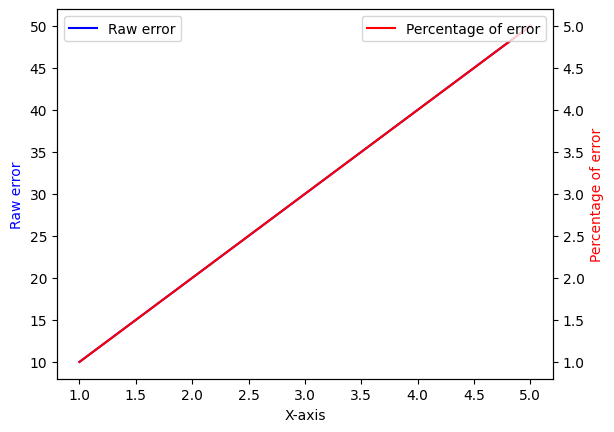

In [6]:
import matplotlib.pyplot as plt

# generate some data
x = [1, 2, 3, 4, 5]
y1 = [10, 20, 30, 40, 50]
y2 = [1, 2, 3, 4, 5]

# create the figure and the first axis
fig, ax1 = plt.subplots()

# plot the first data set
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Raw error', color='blue')

# create the second axis
ax2 = ax1.twinx()

# plot the second data set
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Percentage of error', color='red')

# add a legend
ax1.legend(['Raw error'], loc='upper left')
ax2.legend(['Percentage of error'], loc='upper right')

plt.show()
